<a href="https://colab.research.google.com/github/Mayank2225/Machine-Learning-Application-for-Mechanical-Engineering/blob/main/price_predictions_Mayank_Singh_210598_MLApps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


You are given the data consisting of various features of houses at an unknown place. You are required to predict the sale price of the data of the houses, you may use MLR(Multi Linear regression) for this task.
> The dataset for this task can be downloaded at: https://drive.google.com/file/d/13ILRFONUoDsxuJdLseTLj3e3sHTxROGU/view?usp=share_link

> Also tell the features which affect the house pricing the most i.e. do some data analysis on the data and do so by the help by various maps like we discussed in the online meet we did. And also try some innovative ideas using the dataset that you may figure out.

> Also here is the column descriptions for the dataset:
* date : Date of transaction
* price : Price of house
* bedrooms, bathrooms : Number
* sqft_living, sqft_lot : The Original square footage of the living and lot space when the house was built
* floors : Total floors in the house
* waterfront: Whether the house is on a waterfront(1: yes, 0: no)
* view : special view?
* condition : Condition of the house
* grade : Simply put, the grade or grading around your house is the level of the ground. The ground level and how it's graded is the deciding factor of where storm water will flow
* sqft_above,sqft_basement : Square footage of house apart from basement and basement area
* yr_built : Built year
* yr_renovated : Year when the house was renovated
* zipcode, lat, long : zip code, latitude and logtitude coordinate of the house
* sqft_living15, sqft_lot15 : The latest square footage of the living and lot space ( was taken in 2015 )




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv('Assignment-2_Train_data.csv')

Saving Assignment-2_Train_data.csv to Assignment-2_Train_data (1).csv


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
df["sqft_living15"].fillna(df["sqft_living15"].median(), inplace=True)
#df["sqft_living"].fillna(df["sqft_living"].median(), inplace=True)
df["bedrooms"].fillna(df["bedrooms"].median(), inplace=True)
df["sqft_basement"].fillna(df["sqft_basement"].median(), inplace=True)
df["lat"].fillna(df["lat"].median(), inplace=True)
df["grade"].fillna(df["grade"].median(), inplace=True)
df["sqft_above"].fillna(df["sqft_above"].median(), inplace=True)
df["bathrooms"].fillna(df["bathrooms"].median(), inplace=True)
df["view"].fillna(df["view"].mode()[0], inplace=True)

<ipython-input-170-1e32ae99bbb5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


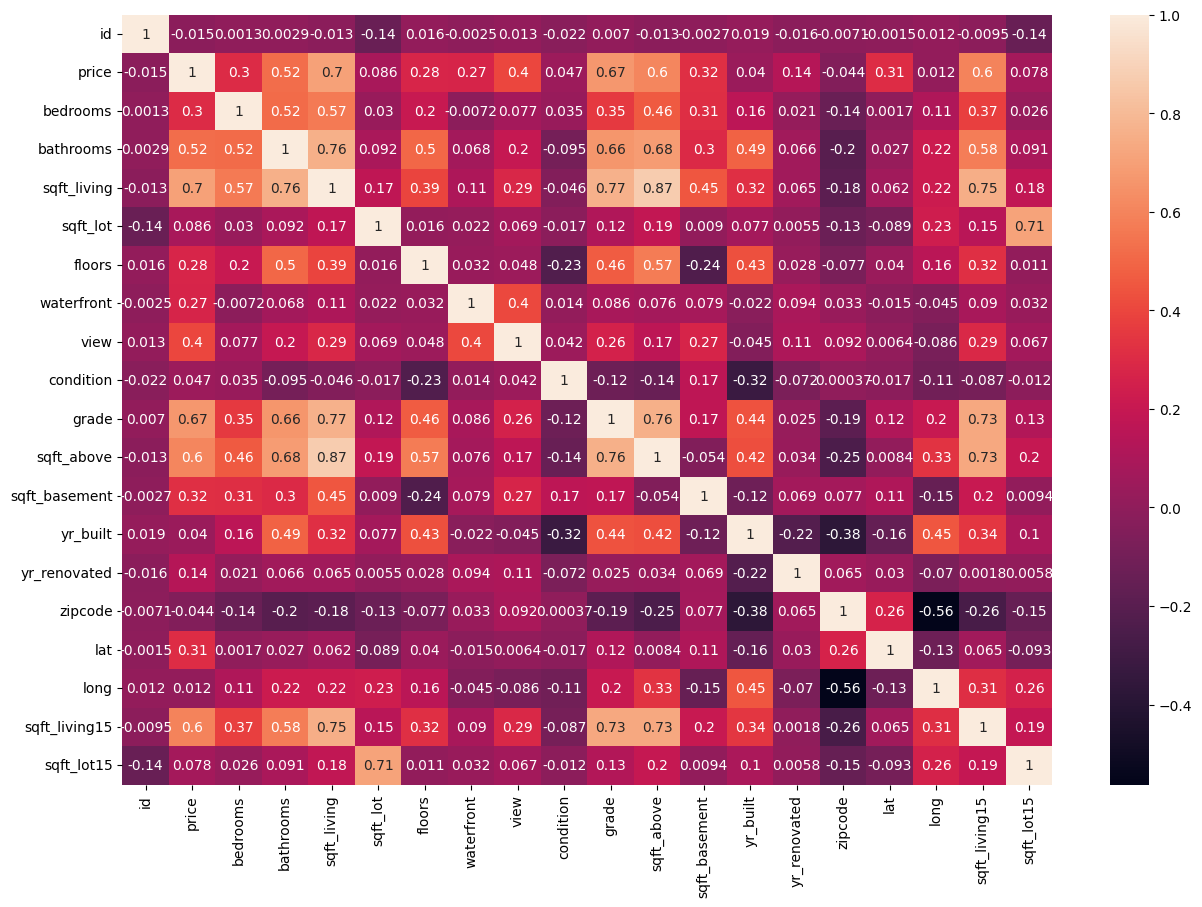

In [ ]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.show()


In [ ]:
X = df[["sqft_living15", "grade", "sqft_above", "bathrooms", "view","bedrooms","sqft_basement","lat"]]
y = df["price"]
#

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.7260990883076474


the features that affect the price most are the one which have the highest correlation with th price
i.e., sqft_living15, grade, sqft_above, bathrooms, view and sqft_living.